# Mfundo Monchwe
# NSTD842

## I Mfundo Monchwe (201726904) pledge on my honour that I have not given or received any  unauthorised help on this test and that all the work submitted is my own

# Question 1

The COVID 19 pandemic has increased customer propensity to shop online. As such, offline brickand-mortar businesses might suffer if they do not find a way to attract customers. This has made 
shopping centres to start looking for ways to remain competitive and attract people to come and do 
face-to-face shopping. At the moment, they do not know what people like or hate about the shopping 
centres. You have been hired as a data scientist to analyse customer reviews of three big shopping 
centres in Kimberley. The dataset contains customer reviews scrapped from Google Map and the 
names of the shopping centres. Use the provided dataset to answer the following questions

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

stop_words.extend(['make', 'want', 'seem', 'run', 'need', 'even', 'not', 'would', 'say', 'could', '_', 
                'be', 'know', 'go', 'get', 'do','get','far','also','way','app','usd','eur','jai','hind','jai_hind',
'done', 'try', 'many','from', 'subject', 're', 'edu','some', 'nice', 'thank','singh','mast','untuk','apne','nise','vgood',
'think', 'see', 'rather', 'lot', 'line', 'even', 'also', 'may', 'use','goog','nce','aap','thik','hai','setu','aarogya_setu','aarogya',
'take', 'come','recommend','recommended','paypal','paytm', 'let','ad','add'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

1.

In [ ]:
from google.colab import  files
uploaded = files.upload()

Saving dataset (1).csv to dataset (1).csv


In [ ]:
data = pd.read_csv('dataset (1).csv', encoding= 'cp1252')
data['Review']= data['Review'].apply(str)
data.sample(10)

,Review,Shopping Center
531,It is very convenient for me.,North Cape Mall
913,Security sucks they riped my back wiper totall...,New Park Center
880,Clean tidy nice soundings,Diamond Pavilion Mall
193,Always neat and tidy especially rest rooms. Al...,North Cape Mall
170,Thank you to all staff from every store the ma...,North Cape Mall
887,Always get something new,Diamond Pavilion Mall
1128,Great service and very accessible,New Park Center
884,Beautiful and clean mall,Diamond Pavilion Mall
1008,"Be careful when making withdrals at the ATMS, ...",New Park Center
278,Ample parking facilities. Clean shops and help...,North Cape Mall


In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = re.sub('[^a-zA-Z0-9]',' ',sent) # remove non english words
        sent = re.sub('\s+',' ',sent) # remove non english words
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = data.Review.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])
# [['from', 'irwin', 'arnstein', 'subject', 're', 'recommendation', 'on', 'duc', 'summary', 'whats', 'it', 'worth', 'distribution', 'usa', 'expires', 'sat', 'may', 'gmt', ...trucated...]]

[['on', 'friday', 'morning', 'was', 'there', 'as', 'usual', 'eating', 'breakfast', 'after', 'leaving', 'the', 'mall', 'to', 'another', 'centre', 'realised', 'on', 'getting', 'out', 'of', 'my', 'car', 'that', 'my', 'driver', 'door', 'was', 'damaged', 'as', 'rudely', 'of', 'another', 'car', 'banging', 'their', 'door', 'contacted', 'the', 'mall', 'for', 'video', 'footage', 'they', 'could', 'not', 'assist', 'me', 'at', 'all', 'they', 'sent', 'me', 'to', 'macdonalds', 'john', 'dory', 'even', 'roco', 'mamma', 'there', 'are', 'no', 'cameras', 'in', 'between', 'the', 'cars', 'in', 'the', 'parking', 'lot', 'they', 'have', 'an', 'arial', 'view', 'of', 'the', 'cars', 'their', 'cameras', 'can', 'see', 'number', 'plates', 'so', 'am', 'left', 'with', 'nothing', 'very', 'very', 'disappointed', 'in', 'the', 'mall', 'security', 'behold', 'if', 'something', 'happens', 'to', 'your', 'child', 'when', 'they', 'are', 'caught', 'in', 'between', 'cars', 'the', 'cameras', 'can', 'see', 'anything']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

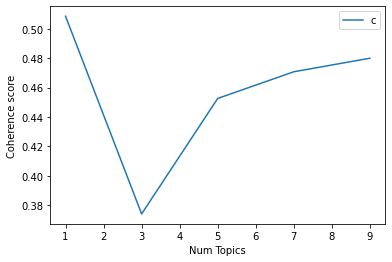

In [ ]:

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_ready, start=1, limit=10, step=2)
# Show graph
import matplotlib.pyplot as plt
limit=10; start=1; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

2. We are not sure as to whether which is of positive and which is of negative
the info given on the graph might be biased which may not lead to good decisions

3. LDA model, word clouds

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)
                                           

pprint(lda_model.print_topics())

[(0,
  '0.095*"shop" + 0.091*"place" + 0.062*"great" + 0.040*"shopping" + '
  '0.032*"good" + 0.027*"staff" + 0.022*"food" + 0.020*"experience" + '
  '0.018*"space" + 0.018*"helpful"'),
 (1,
  '0.137*"cause" + 0.135*"alcool" + 0.082*"parking" + 0.028*"busy" + '
  '0.025*"always" + 0.016*"customer" + 0.014*"locate" + 0.014*"clean" + '
  '0.012*"day" + 0.011*"conveniently"'),
 (2,
  '0.056*"checker" + 0.052*"shop" + 0.047*"center" + 0.038*"small" + '
  '0.033*"click" + 0.019*"big" + 0.019*"price" + 0.013*"pep" + 0.012*"help" + '
  '0.010*"buy"'),
 (3,
  '0.086*"service" + 0.049*"friendly" + 0.028*"time" + 0.028*"visit" + '
  '0.027*"mall" + 0.027*"people" + 0.020*"excellent" + 0.019*"problem" + '
  '0.018*"area" + 0.018*"basic"'),
 (4,
  '0.092*"complain" + 0.064*"shopping" + 0.057*"shop" + 0.052*"good" + '
  '0.035*"clean" + 0.033*"place" + 0.032*"convenient" + 0.026*"safe" + '
  '0.026*"parking" + 0.025*"variety"'),
 (5,
  '0.049*"store" + 0.032*"close" + 0.028*"bank" + 0.024*"clothing

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 196 kB/s 
     |████████████████████████████████| 15.7 MB 58 kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=846c92b7c8755c685f44e487d564804b490d481bd03337c001d396ab977bc730
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into 

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as pygen

In [ ]:
pyLDAvis.enable_notebook()
vis = pygen.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.213065  0.093212       1        1  26.603941
0      0.219598 -0.030908       2        1  22.196161
3     -0.113886 -0.080235       3        1  13.930471
5     -0.124241 -0.107803       4        1  13.294519
1     -0.159145  0.251743       5        1  12.851812
2     -0.035391 -0.126008       6        1  11.123098, topic_info=          Term        Freq       Total Category  logprob  loglift
398      cause  106.000000  106.000000  Default  30.0000  30.0000
1218    alcool  105.000000  105.000000  Default  29.0000  29.0000
882   complain  147.000000  147.000000  Default  28.0000  28.0000
39       place  175.000000  175.000000  Default  27.0000  27.0000
40        shop  252.000000  252.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
43         big   12.896552   24.445096   Topic6  -3.9464   1.5567
40        shop   34.480637  252.306429   Topic6  -2.9630   0.2059
366       spot    3.046900    5.699775   Topic6  -5.3892   1.5698
19        mall    6.021151   88.875303   Topic6  -4.7081  -0.4958
82      people    3.418295   26.361941   Topic6  -5.2742   0.1534

[255 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
145       1  0.855243      access
31        4  0.910272  accessible
503       5  0.834486    actually
1218      5  0.986976      alcool
374       5  0.893801      almost
...     ...       ...         ...
534       6  0.800709       wheel
220       2  0.903721   wonderful
342       1  0.915981        work
491       4  0.762392       worth
733       6  0.807672       young

[232 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 6, 2, 3])

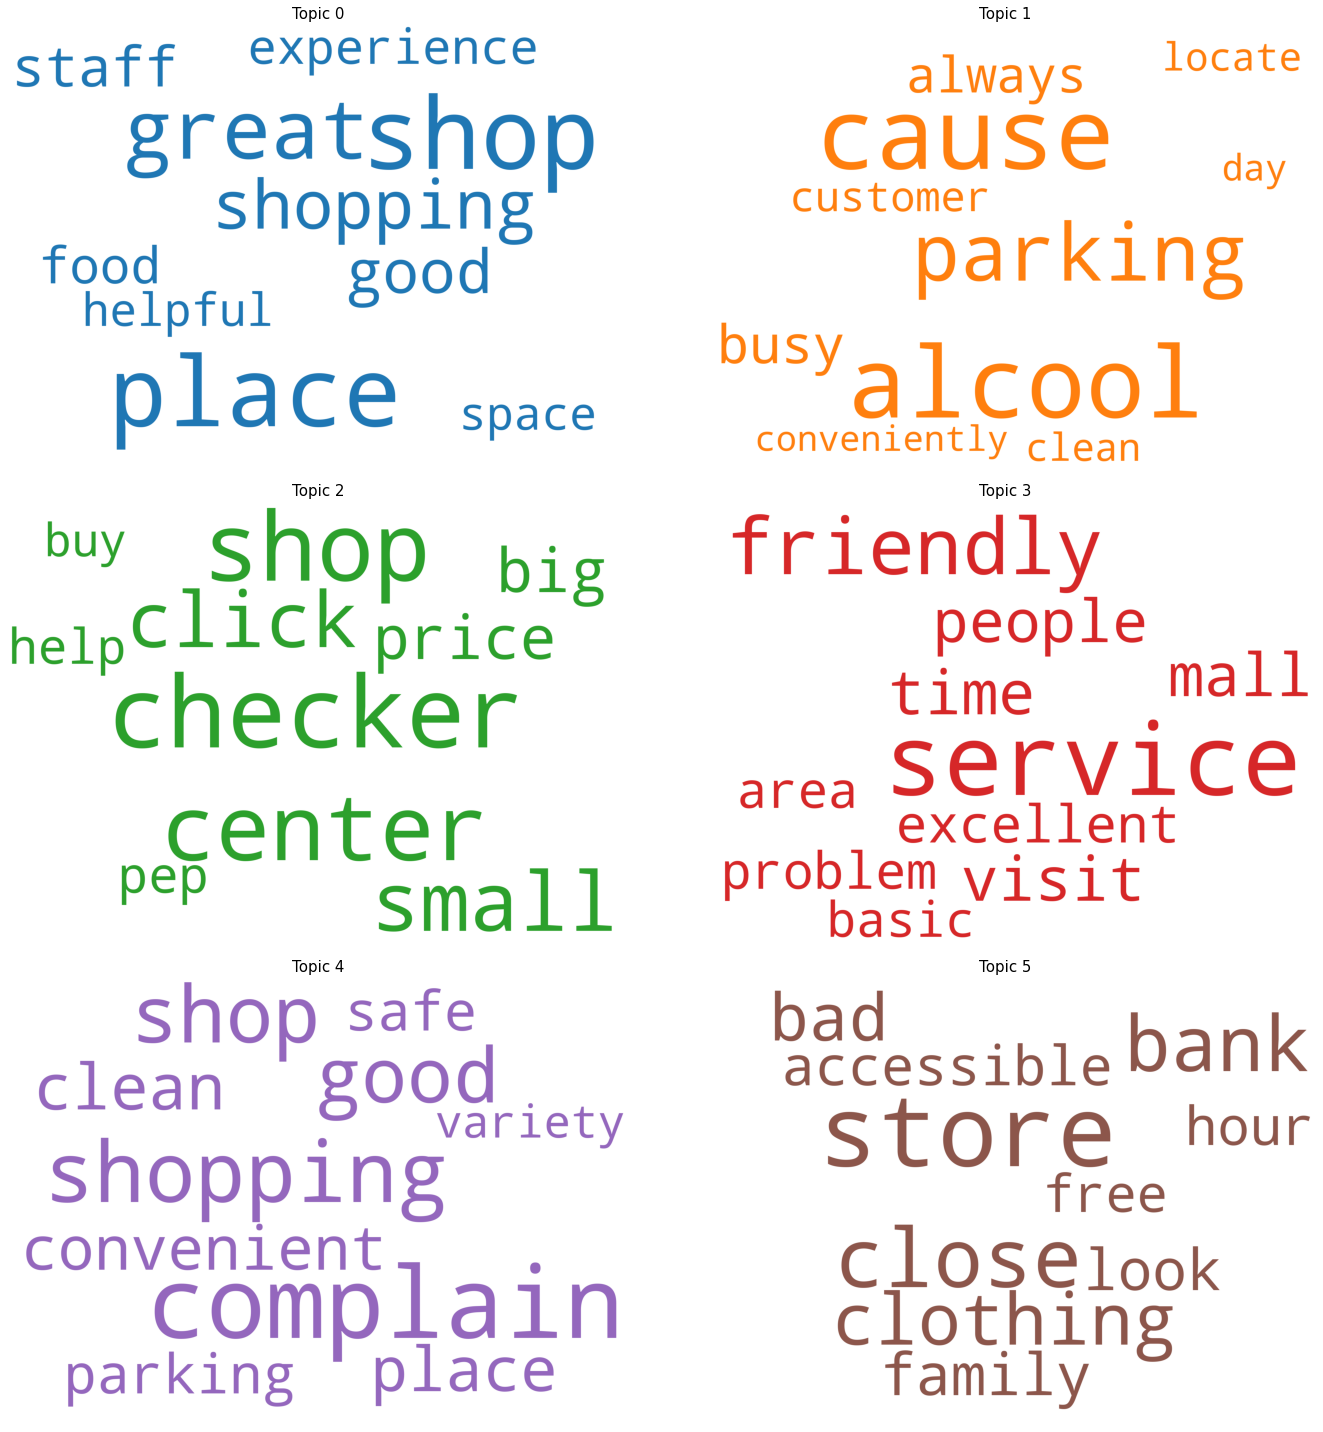

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)



fig, axes = plt.subplots(3, 2, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=400)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=15))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('wordcloud_plot.png', dpi=300)
plt.show()

Topic 1: indicates that there great shopping   and also good staff (this is for good review)


 Topic 2: under this topic  seems like customers do not like shopping compared to topic1 . reason might its too busy inside also involving the issue of having to park your car

 Topic 3: seems to have a great service indicated by the pyldavis at shopping centre

topic 4: referring to accessbility of stores and how kind the staff and cusmoer service 

Topic 5: the dominant themes for 5 are  mall and clean referring to the hygiene part

Topic 6: shop and mall are the dominant themes for 6

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.7991,"service, friendly, time, visit, mall, people, ...","[morning, usual, eat, breakfast, leave, mall, ..."
1,1,4.0,0.5034,"complain, shopping, shop, good, clean, place, ...","[call, shop, basis, locate, accessible, conven..."
2,2,3.0,0.5976,"service, friendly, time, visit, mall, people, ...","[love, mall, feel, close, live, big, city, dri..."
3,3,5.0,0.6424,"store, close, bank, clothing, bad, family, loo...","[ideal, family, outing, restaurant, choose, ci..."
4,4,4.0,0.6280,"complain, shopping, shop, good, clean, place, ...","[mall, find, safe, people, shop, stress, thief..."
5,5,4.0,0.7496,"complain, shopping, shop, good, clean, place, ...","[well, situate, town, easy, safe, parking, ava..."
6,6,0.0,0.8842,"shop, place, great, shopping, good, staff, foo...","[favourite, mall, love, restaurant, route, sto..."
7,7,4.0,0.7521,"complain, shopping, shop, good, clean, place, ...","[great, stop, shop, kind, mall, likely, find, ..."
8,8,3.0,0.8856,"service, friendly, time, visit, mall, people, ...","[mellin, never, people, still, treat, democrat..."
9,9,0.0,0.6072,"shop, place, great, shopping, good, staff, foo...","[easy, access, great, store, wide, variety, st..."


In [ ]:
df_dominant_topic['Review'] = data['Review']

In [ ]:
df_dominant_topic['Review'].loc[df_dominant_topic['Dominant_Topic'] == 0.0].sample(2) #topic1


4.

In [ ]:
df_dominant_topic['Centre'] = data['Shopping Center']

In [ ]:
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.7991,"service, friendly, time, visit, mall, people, ...","[morning, usual, eat, breakfast, leave, mall, ..."
1,1,4.0,0.5034,"complain, shopping, shop, good, clean, place, ...","[call, shop, basis, locate, accessible, conven..."
2,2,3.0,0.5976,"service, friendly, time, visit, mall, people, ...","[love, mall, feel, close, live, big, city, dri..."
3,3,5.0,0.6424,"store, close, bank, clothing, bad, family, loo...","[ideal, family, outing, restaurant, choose, ci..."
4,4,4.0,0.6280,"complain, shopping, shop, good, clean, place, ...","[mall, find, safe, people, shop, stress, thief..."


In [ ]:
import seaborn sns

5 Choose any 3 topics

# Topic 6

they try to squeeze more hours  for mall
mostly in the evenings

# Topic 4
as for the store maybe try to extend the mall

# Topic 2

increase the parking space
or the manager can try to limit the parking space


# Question 2

## 2.1 figure 1: Javascript code
 indicates that it creates a javascript with a filename hello.js
 that creates sort of a template button that has on click of hello
 with a value of 'say hello'

then we have function called sayHello which will give an alert to the user that displays 'Hello World'

## 2.2.1 line 33 vs line 38

the app will be used to map the specific url with the associated  function which is intended to perform  a particular task while line 38 is about the employment prediction 

## 2.2.2 line 35 vs line 56
line 35 generates output while line 56 returns the out of predictiond based on the probabilities given 

## 2.3 the html basically creates an interface for users to fill up their details and using the post method and the form will predict based on the inputs from the user given 10 rows and 15 cols then input type eill be 'submit' , value = 'submit' the form

## 2.4.1 saves the model or pickles those model
## 2.4.2 in order to deployed and be used for predictions 

## 2.4.3 unpickling

## 2.4.4 pickle pickle.dump(lr,open(review_model,'wb')
